In [1]:
import base64
import os

from PIL import Image
from netCDF4 import Dataset
import cv2

import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import climlab
import solarpower
import solarenergy as se
from solarenergy import d2r, r2d

os.chdir('/mnt/sdb1/wscho/Jobs/gk2aICT/src/tools/')
from api_gk2a import down_gk2a

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
global f_name, v_name
f_name = {'Cloud' : 'cla_ea020lc'}
v_name = {'Cloud' : 'CF'}
base_dir = '/mnt/sdb1/wscho/data_for_research/ICTgk2a/'

In [3]:
def read_g2ka(str_time, base_path='/mnt/sdb1/wscho/data_for_research/ICTgk2a/',var = 'Cloud'):
    
    f_name_func = f_name[var]
    v_name_func = v_name[var]
    file_name = f'gk2a_ami_le2_{f_name_func}_{str_time}.nc'    
    ds = Dataset(os.path.join(base_path, file_name))
    print(ds)
    arr = np.array(ds[v_name_func][:])
    arr = 2 - arr
    
    arr[arr==1]= -100
    
    return arr

In [4]:
def get_simple_ghi(lat = 36.5, lon = 128, time = pd.to_datetime('2022-07-01 12:00:00')):
    
    
    geoLon = lon*d2r  # Geographic longitude (>0 for eastern hemisphere; ° -> rad)
    geoLat = lat*d2r  # Geographic latitude  (>0 for northern hemisphere; ° -> rad)
    
    # Orientation of my solar panels:
    spAz   = 0*d2r  # Azimuth ('wind direction') of my panels are facing.  Note: South=0, W=90° (pi/2 rad) in the northern hemisphere!  (rad)
    spIncl = 28*d2r  # Inclination of my panels w.r.t. the horizontal  (rad)

    # An hour past noon local time on 1 March 2020:
    myTZ  = 'Asia/Seoul'
    
    year  = time.year
    month = time.month
    day   = time.day
    hour  = time.hour


    # Compute Sun position (uses SolTrack behind the scenes):
    sunAz,sunAlt,sunDist = se.sun_position_from_date_and_time(geoLon,geoLat, year,month,day, hour, timezone=myTZ)

    I_ext     = 1361.5 / sunDist**2                                 # Extraterrestrial radiation (at the top of the atmosphere; AM0)
    # CA        =                                                     # Cloud Amount when 
    # CH        =                                                     # Cloud Height
    # CF        =                                                     # Cloud Fraction in 
    AM        = se.airmass(sunAlt)                                  # Air mass for this Sun altitude
    extFac    = se.extinction_factor(AM)                            # Extinction factor at sea level for this airmass
    cosTheta  = se.cos_angle_sun_panels(spAz,spIncl, sunAz,sunAlt)  # cos of the angle with which Sun hits my panels

    DNI       = I_ext / extFac                                      # DNI for a clear sky
    dirRad    = DNI * cosTheta*0.23                                 # Insolation of direct sunlight on my panels * efficiency


    # Print input and output:
#     print("Location:           %0.3lf E, %0.3lf N"  % (geoLon*r2d, geoLat*r2d))
#     print("Date:               %4d-%2.2d-%2.2d"     % (year, month, day))
#     print("Time:               %2d:00"              % (hour))
#     print()

#     print("Sun azimuth:        %7.3lf°"   % (sunAz*r2d))
#     print("Sun altitude:       %7.3lf°"   % (sunAlt*r2d))
#     print("Sun distance:       %7.4lf AU" % (sunDist))
#     print()

#     print("I_ext:              %7.1lf W/m²"    % (I_ext))
#     print()

#     print("Air mass:           %7.3lf"         % (AM))
#     print("Extinction factor:  %7.3lf"         % (extFac))
#     print("DNI:                %7.1lf W/m²"    % (DNI))
#     print()

#     print("Sun-panels angle:   %7.1lf°"        % (np.arccos(cosTheta)*r2d))
#     print("Direct insolation:  %7.1lf W/m²"    % (dirRad))
    
    return dirRad

In [7]:
for d in np.arange(202304170000,202304172300,100):
    date_str = str(d)
    down_gk2a(date = date_str, area='FD', lv ='LE2', ch='AMV-WV063-CD', down_dir=base_dir)

Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170000.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170100.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170200.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170300.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170400.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170500.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170600.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170700.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170800.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304170900.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304171000.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304171100.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_202304171200.nc
Complete to download: gk2a_ami_le2_amv-wv063-cd_fdzzzll_20230417

## 기본 데이터 

In [485]:
#import fcst data 
raw_result.to_pickle('/mnt/sdb1/wscho/data_for_research/datum/신보령.pkl')
raw_result = pd.read_pickle('/mnt/sdb1/wscho/data_for_research/datum/신보령.pkl')
# plant_meta = pd.read_pickle('/mnt/sdb1/wscho/Jobs/mos_automation/proj_data/metadata.pkl')

plant_meta

,name,stn_id,address,latitude,longitude,altitude
1,보령,010101,충남 보령시 오천면 오포리 773,36.401510,126.493017,104
1,보령,010102,충남 보령시 오천면 오포리 773,36.401510,126.493017,104
6,인천,020101,인천광역시 서구 중봉대로 405번길 411,37.511630,126.607356,104
6,인천,020102,인천광역시 서구 중봉대로 405번길 411,37.511630,126.607356,104
6,인천,020103,인천광역시 서구 중봉대로 405번길 411,37.511630,126.607356,104
0,서울,030101,서울 강서구 마곡동 114-2,37.577307,126.828902,104
7,서천,040101,충남 서천군 서면 서인로 235번길 88,36.146189,126.500696,104
8,여수,040102,전남 여수시 덕충동 에너지파크,34.759798,127.752154,104
3,제주1,050102,제주시 원당로 133,33.495919,126.595700,104
4,제주2,050103,제주시 제주대학로 102,33.495919,126.595700,104


In [486]:
plant_id = '010102'

raw_result.index = pd.to_datetime(raw_result.index,format='%Y-%m-%d %H:%M:%S.%f')

plant_name = plant_meta[plant_meta.stn_id==plant_id].name.values[0]
lat_p = plant_meta[plant_meta.stn_id==plant_id].latitude.values[0]
lon_p = plant_meta[plant_meta.stn_id==plant_id].longitude.values[0]

print('####'*15)
print(f'\n Plant Name   :::   {plant_name} \n')
print('####'*15)
print(f'\n Latitude   :::   {lat_p}')
print(f' Longitude  :::   {lon_p} \n')
print('####'*15)
print(' '*20 + f' Target_date\n\n | {raw_result.index[0]}    ~    {raw_result.index[-1]} |')

############################################################

 Plant Name   :::   보령 

############################################################

 Latitude   :::   36.40151
 Longitude  :::   126.493017 

############################################################
                     Target_date

 | 2022-06-01 00:00:00    ~    2022-12-31 23:00:00 |


In [487]:
raw_result.reset_index(inplace=True)
raw_result['simple_ghi'] = raw_result.dt.apply(lambda t : get_simple_ghi(lat_p, lon_p, t))
raw_result.set_index('dt',inplace=True)

In [488]:
raw_result['simple_diff'] = abs(raw_result.simple_ghi - raw_result.RL_GENERATION)
raw_result['pycaret_diff'] = abs(raw_result.pycaret - raw_result.RL_GENERATION)

In [505]:
nmae_smp = raw_result[raw_result.RL_GENERATION>=raw_result.RL_GENERATION.max()].simple_diff.mean()/raw_result.RL_GENERATION.max()*100
print(f'\nSIMPLE NMAE : {nmae_smp.round(3)}%\n')


SIMPLE NMAE : 19.027%



In [504]:
nmae_pyc = raw_result[raw_result.RL_GENERATION>=raw_result.RL_GENERATION.max()].pycaret_diff.mean()/raw_result.RL_GENERATION.max()*100
print(f'\nPycaret NMAE : {nmae_pyc.round(3)}%\n')


Pycaret NMAE : 4.36%



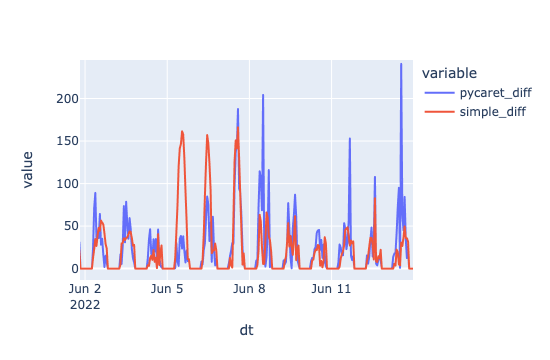

In [461]:
raw_result[['pycaret_diff','simple_diff']].plot()

array([[<AxesSubplot:xlabel='pycaret', ylabel='pycaret'>,
        <AxesSubplot:xlabel='RL_GENERATION', ylabel='pycaret'>,
        <AxesSubplot:xlabel='pycaret_diff', ylabel='pycaret'>,
        <AxesSubplot:xlabel='simple_ghi', ylabel='pycaret'>,
        <AxesSubplot:xlabel='simple_diff', ylabel='pycaret'>],
       [<AxesSubplot:xlabel='pycaret', ylabel='RL_GENERATION'>,
        <AxesSubplot:xlabel='RL_GENERATION', ylabel='RL_GENERATION'>,
        <AxesSubplot:xlabel='pycaret_diff', ylabel='RL_GENERATION'>,
        <AxesSubplot:xlabel='simple_ghi', ylabel='RL_GENERATION'>,
        <AxesSubplot:xlabel='simple_diff', ylabel='RL_GENERATION'>],
       [<AxesSubplot:xlabel='pycaret', ylabel='pycaret_diff'>,
        <AxesSubplot:xlabel='RL_GENERATION', ylabel='pycaret_diff'>,
        <AxesSubplot:xlabel='pycaret_diff', ylabel='pycaret_diff'>,
        <AxesSubplot:xlabel='simple_ghi', ylabel='pycaret_diff'>,
        <AxesSubplot:xlabel='simple_diff', ylabel='pycaret_diff'>],
       [<AxesSubpl

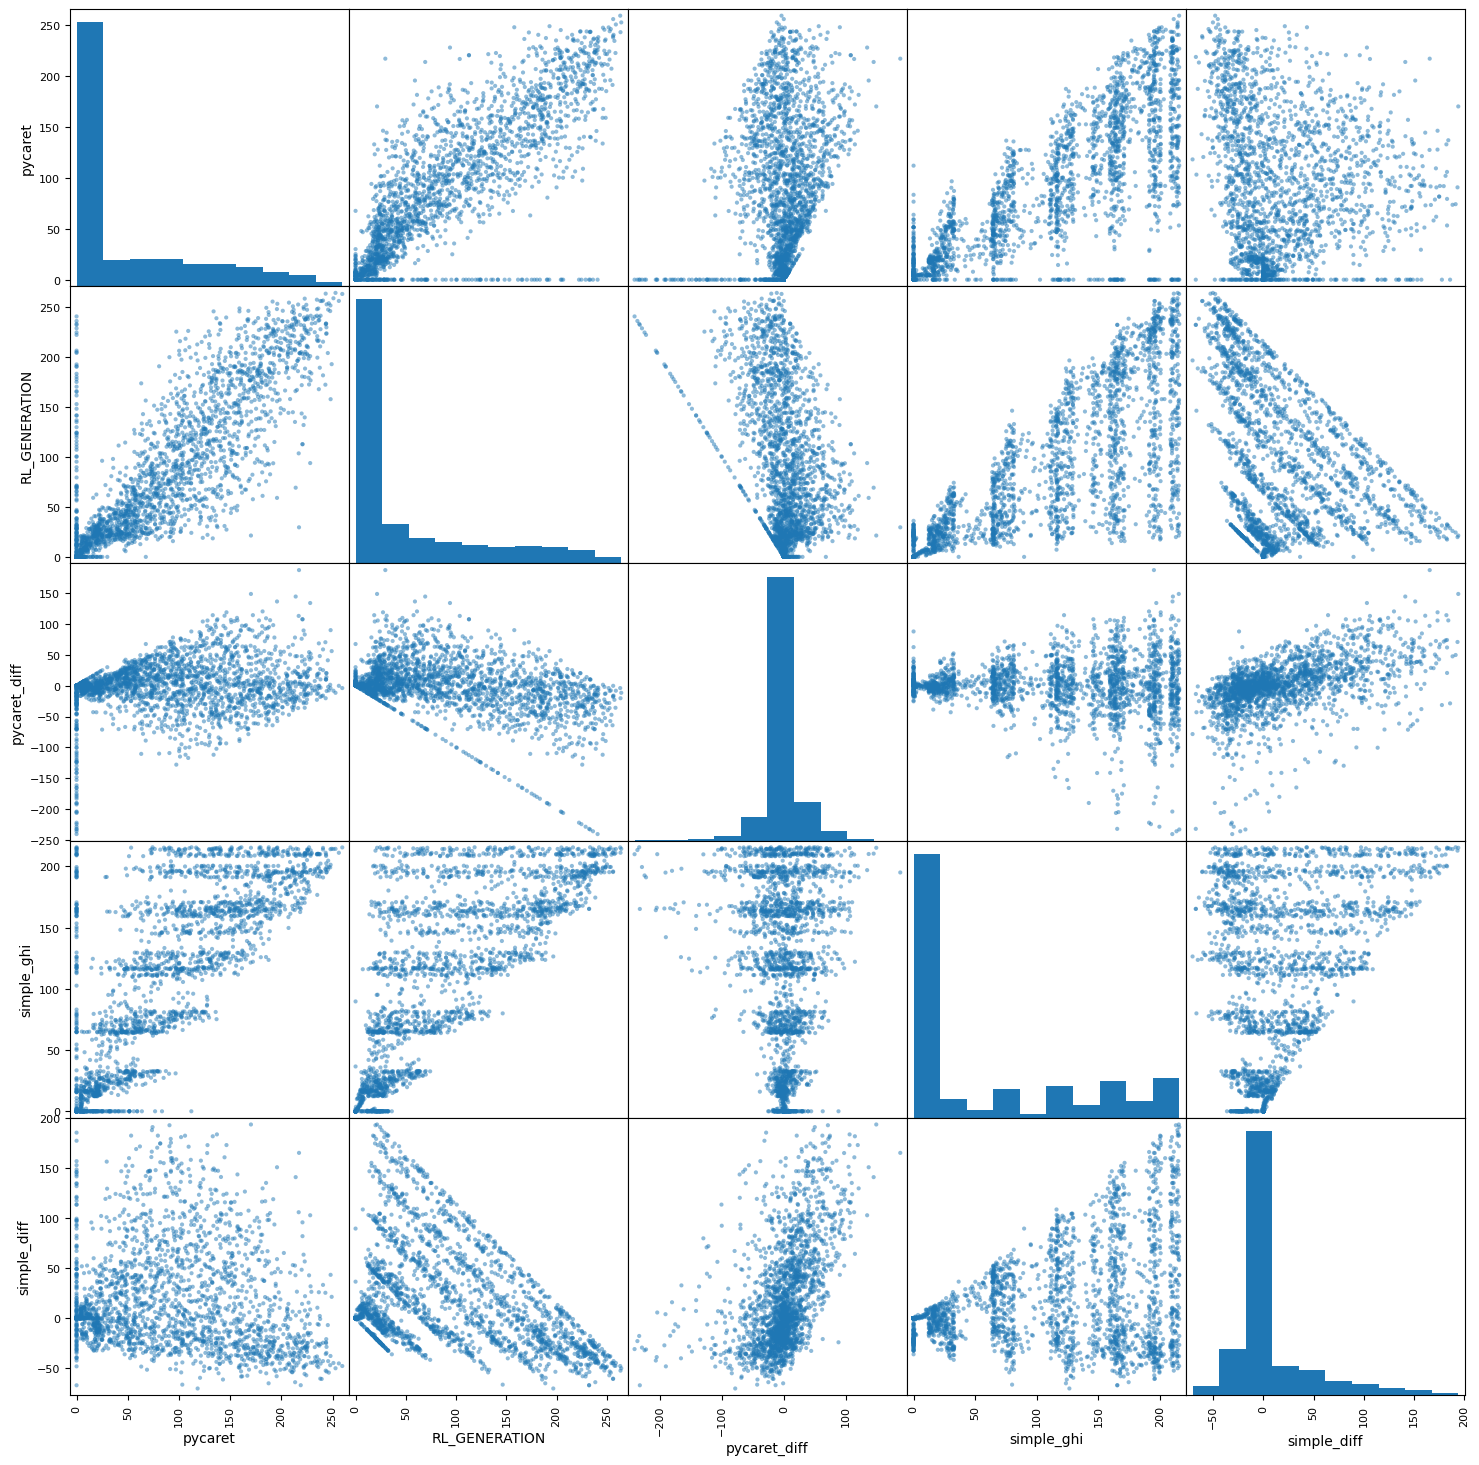

In [452]:
pd.plotting.scatter_matrix(raw_result, figsize=(18,18))

In [511]:
mon_res = pd.pivot_table(raw_result,
          index = raw_result.index.hour
        )

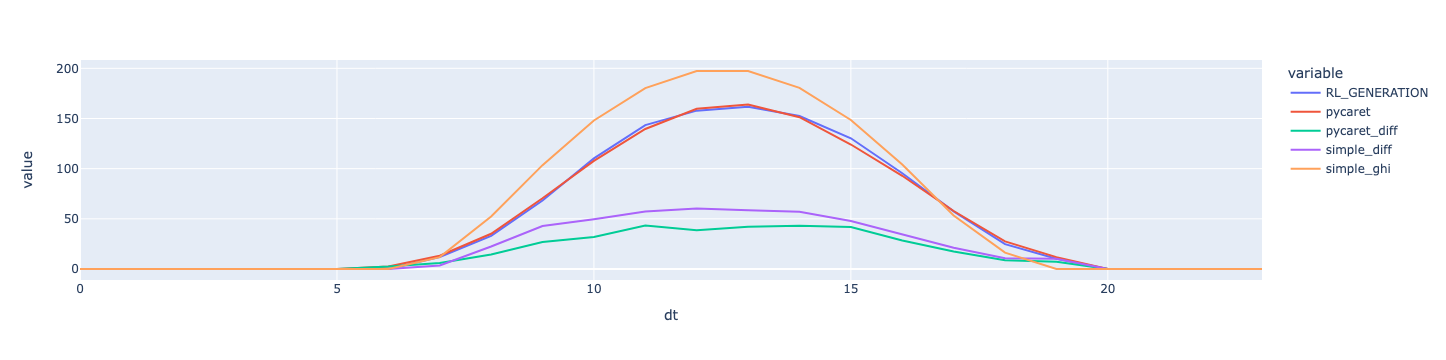

In [512]:
mon_res.plot()

## CLD 만 이용

In [44]:
cloud_fraction = read_g2ka(str_time = '202206141100',var = 'Cloud')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_creation_time: 2022-06-14T11:18:30.643Z
    origianl_sourece_file: gk2a_ami_le2_cla_fd020ge_202206141100.nc
    algorithm_version: GK2A_CLA_v2.1.2.4
    comment: TBD
    conventions: CF-1.7
    institution: KMA/NMSC> Korea Meteorological Administration, National Meteorological Satellite Center
    instrument: GK-2A Advanced Meteorological Imager
    license: Access is restricted to approved users only
    metadata_conventions: Unidata Dataset Discovery v1.0
    names_of_product: CT, CLL, CA, CF, CT_DQF, CF_DQF, CA_DQF
    number_of_product: 7
    observation_mode: FD
    processing_area: FD
    processing_environment: operation
    references: RAP03 CLA v1.0
    title: AMI L2 CLA
    dimensions(sizes): dim_y(2600), dim_x(3000)
    variables(dimensions): uint16 CA(dim_y, dim_x), uint8 CA_DQF(dim_y, dim_x), uint16 CF(dim_y, dim_x), uint8 CF_DQF(dim_y, dim_x), uint8 CLL(dim_y, dim_x), uint8 CT(d

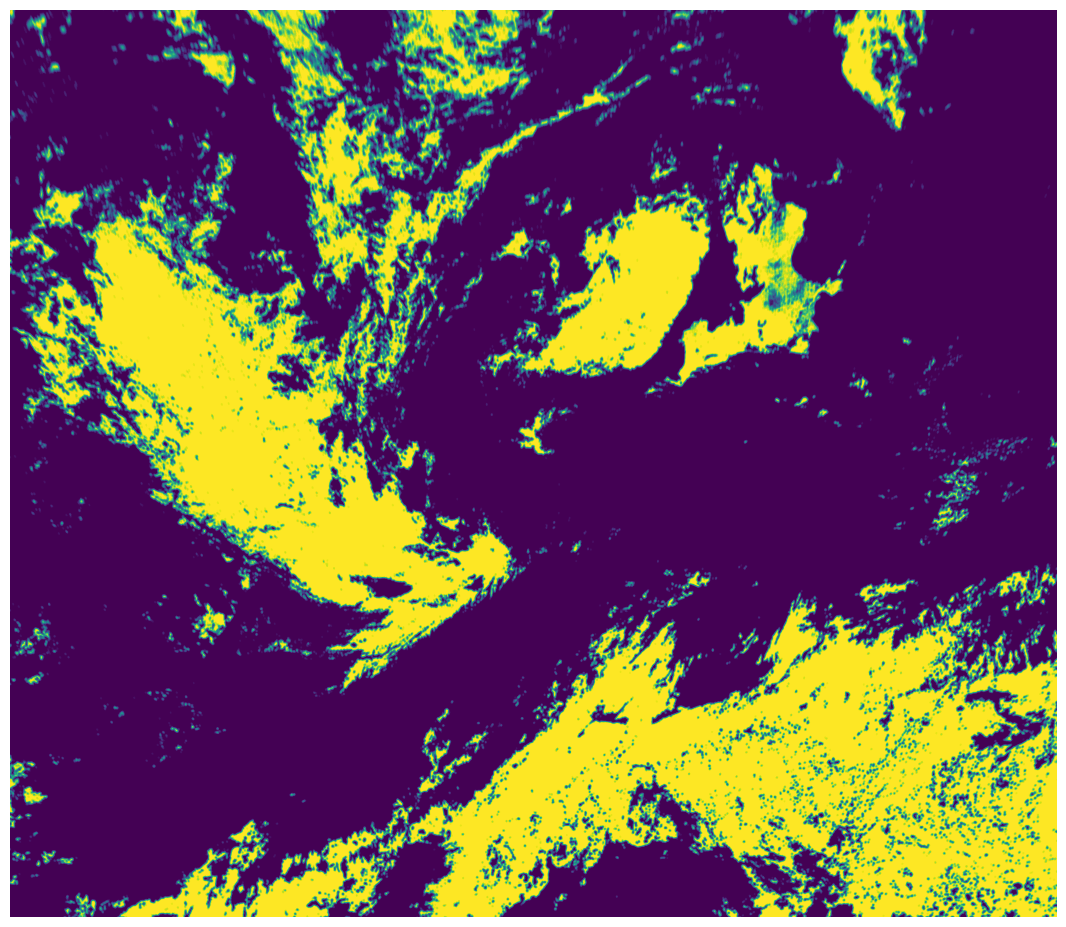

In [29]:
fig, ax = plt.subplots(1, 1)
ax.imshow(c)
ax.axis('off')
fig.subplots_adjust(right=2, top=2)

In [41]:
cloud_amount.sort()

In [42]:
cloud_amount

array([[-98., -98., -98., ...,   2.,   2.,   2.],
       [-98., -98., -98., ...,   2.,   2.,   2.],
       [-98., -98., -98., ...,   2.,   2.,   2.],
       ...,
       [-98., -98., -98., ...,   2.,   2.,   2.],
       [-98., -98., -98., ...,   2.,   2.,   2.],
       [-98., -98., -98., ...,   2.,   2.,   2.]], dtype=float32)

In [ ]:
down_gk2a(_st, lv, ch, AREA, down_dir)

## CLD + CF or CA

## CLD + CF or CA + CT

## COT

## Downward ShortWave Radiation